In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv
from scipy.stats import linregress

# Study data files
FEMA_data = "FEMA_data.csv"
US_Presidents = "USpresidents.csv"

FEMA_df = pd.read_csv(FEMA_data)
Pres_df = pd.read_csv(US_Presidents)


In [2]:
#write missing president data to president dataframe
with open(US_Presidents, "a") as myfile:
    writer=csv.writer(myfile, delimiter=",")
    myfile.write('\n')
    writer.writerow(['2014', 'Barack Obama', 'Democrat'])
    writer.writerow(['2015', 'Barack Obama', 'Democrat'])
    writer.writerow(['2016', 'Barack Obama', 'Democrat'])
    writer.writerow(['2017', 'Donald Trump', 'Republican'])

In [3]:
# Pull out year in Start Date in FEMA data 
FEMA_df_start_date = pd.to_datetime(FEMA_df['Start Date'])
FEMA_df_end_date = pd.to_datetime(FEMA_df['End Date'])

disaster_length = FEMA_df_end_date - FEMA_df_start_date

In [4]:
disaster_length

0       0 days
1       0 days
2       0 days
3       0 days
4       0 days
         ...  
46180   9 days
46181   9 days
46182   9 days
46183   9 days
46184   9 days
Length: 46185, dtype: timedelta64[ns]

In [5]:
FEMA_df['Year'] = pd.DatetimeIndex(FEMA_df['Start Date']).year
FEMA_df['End Year'] = pd.DatetimeIndex(FEMA_df['End Date']).year
Pres_df = Pres_df.rename(columns={"Years (after inauguration)":"Year"})

In [6]:
Pres_df

,Year,President,Party
0,1789,George Washington,None
1,1790,George Washington,None
2,1791,George Washington,None
3,1792,George Washington,None
4,1793,George Washington,None
...,...,...,...
278,2017,Donald Trump,Republican
279,2014,Barack Obama,Democrat
280,2015,Barack Obama,Democrat
281,2016,Barack Obama,Democrat


In [7]:
merged_df = pd.merge(FEMA_df, Pres_df, on="Year", how="left")

In [8]:
merged_df

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,Year,End Year,President,Party
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82346,DR-4301,Disaster,02/14/2017,CA,Yuba County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican
82347,DR-4301,Disaster,02/14/2017,CA,Yuba County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican
82348,DR-4301,Disaster,02/14/2017,CA,Yuba County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican
82349,DR-4301,Disaster,02/14/2017,CA,Yuba County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican


In [9]:
#cleaning out unnecesssary columns 
cleaned_df = merged_df[["Year", "President", "Party", "Declaration Number","Declaration Type", "Disaster Type", "State", "Start Date", "End Date"]]

In [10]:
cleaned_df = cleaned_df.drop_duplicates(subset = ["Declaration Number"], keep="first")

In [11]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953
...,...,...,...,...,...,...,...,...,...
81651,2017,Donald Trump,Republican,DR-4299,Disaster,Storm,OK,01/13/2017,01/16/2017
81791,2017,Donald Trump,Republican,DR-4300,Disaster,Tornado,LA,02/07/2017,02/07/2017
81819,2017,Donald Trump,Republican,DR-4302,Disaster,Storm,CA,01/03/2017,01/05/2017
81833,2017,Donald Trump,Republican,EM-3381,Emergency,Dam/Levee Break,CA,02/07/2017,NaN


In [12]:
drop_year = cleaned_df[cleaned_df["Year"]==2017].index

In [13]:
cleaned_df.drop(drop_year, inplace = True)

In [14]:
cleaned_df.loc[(cleaned_df['Declaration Number'] == 'DR-4255'), 'Start Date'] = '12/26/2015'
cleaned_df.loc[(cleaned_df['Declaration Number'] == 'DR-4255'), 'Year'] = 2015

In [15]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953
...,...,...,...,...,...,...,...,...,...
80601,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016
80741,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016
80797,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016
80965,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016


In [16]:
#Finding number of disaster declarations by president
president_group = cleaned_df.groupby(["President"])["Declaration Number"].nunique()
president_group

President
Barack Obama             763
Bill Clinton             554
Dwight D. Eisenhower     106
George Bush              159
George W. Bush          1033
Gerald Ford              133
Jimmy Carter             176
John F. Kennedy           34
Lyndon B. Johnson        111
Richard M. Nixon         157
Ronald Reagan            193
Name: Declaration Number, dtype: int64

In [17]:
#Finding number of years each president served 
president_term = cleaned_df.groupby(["President"])["Year"].nunique()
president_term

President
Barack Obama            8
Bill Clinton            8
Dwight D. Eisenhower    8
George Bush             4
George W. Bush          8
Gerald Ford             3
Jimmy Carter            4
John F. Kennedy         2
Lyndon B. Johnson       6
Richard M. Nixon        5
Ronald Reagan           8
Name: Year, dtype: int64

In [18]:
president_disaster_count = pd.DataFrame(data=
        {"President Term":president_term, 
        "Disaster Count":president_group})

In [19]:
president_disaster_count

,President Term,Disaster Count
President,,
Barack Obama,8,763
Bill Clinton,8,554
Dwight D. Eisenhower,8,106
George Bush,4,159
George W. Bush,8,1033
Gerald Ford,3,133
Jimmy Carter,4,176
John F. Kennedy,2,34
Lyndon B. Johnson,6,111


In [20]:
pres_party = pd.merge(president_disaster_count, cleaned_df[["Party", "President"]], on="President", how="left")
pres_party = pres_party.drop_duplicates(keep="first").reset_index()
pres_party

,index,President,President Term,Disaster Count,Party
0,0,Barack Obama,8,763,Democrat
1,763,Bill Clinton,8,554,Democrat
2,1317,Dwight D. Eisenhower,8,106,Republican
3,1423,George Bush,4,159,Republican
4,1582,George W. Bush,8,1033,Republican
5,2615,Gerald Ford,3,133,Republican
6,2748,Jimmy Carter,4,176,Democrat
7,2924,John F. Kennedy,2,34,Democrat
8,2958,Lyndon B. Johnson,6,111,Democrat
9,3069,Richard M. Nixon,5,157,Republican


In [21]:
pres_party = pres_party.drop(columns="index")

In [22]:
#pres_party = pd.DataFrame(index_col = "President")

In [23]:
pres_party

,President,President Term,Disaster Count,Party
0,Barack Obama,8,763,Democrat
1,Bill Clinton,8,554,Democrat
2,Dwight D. Eisenhower,8,106,Republican
3,George Bush,4,159,Republican
4,George W. Bush,8,1033,Republican
5,Gerald Ford,3,133,Republican
6,Jimmy Carter,4,176,Democrat
7,John F. Kennedy,2,34,Democrat
8,Lyndon B. Johnson,6,111,Democrat
9,Richard M. Nixon,5,157,Republican


In [24]:
pres_party["Avg Declarations per Year"] = pres_party["Disaster Count"] / pres_party["President Term"]

In [25]:
pres_party

,President,President Term,Disaster Count,Party,Avg Declarations per Year
0,Barack Obama,8,763,Democrat,95.375000
1,Bill Clinton,8,554,Democrat,69.250000
2,Dwight D. Eisenhower,8,106,Republican,13.250000
3,George Bush,4,159,Republican,39.750000
4,George W. Bush,8,1033,Republican,129.125000
5,Gerald Ford,3,133,Republican,44.333333
6,Jimmy Carter,4,176,Democrat,44.000000
7,John F. Kennedy,2,34,Democrat,17.000000
8,Lyndon B. Johnson,6,111,Democrat,18.500000
9,Richard M. Nixon,5,157,Republican,31.400000


In [26]:
pres_party["President Term 2"] = pres_party["President Term"]/4
pres_party

,President,President Term,Disaster Count,Party,Avg Declarations per Year,President Term 2
0,Barack Obama,8,763,Democrat,95.375000,2.00
1,Bill Clinton,8,554,Democrat,69.250000,2.00
2,Dwight D. Eisenhower,8,106,Republican,13.250000,2.00
3,George Bush,4,159,Republican,39.750000,1.00
4,George W. Bush,8,1033,Republican,129.125000,2.00
5,Gerald Ford,3,133,Republican,44.333333,0.75
6,Jimmy Carter,4,176,Democrat,44.000000,1.00
7,John F. Kennedy,2,34,Democrat,17.000000,0.50
8,Lyndon B. Johnson,6,111,Democrat,18.500000,1.50
9,Richard M. Nixon,5,157,Republican,31.400000,1.25


In [27]:
cleaned_df["Disaster Length"] = pd.to_datetime(cleaned_df["End Date"]) - pd.to_datetime(cleaned_df["Start Date"])

In [28]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days
...,...,...,...,...,...,...,...,...,...,...
80601,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days
80741,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days
80797,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days
80965,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days


In [29]:
pres_party

,President,President Term,Disaster Count,Party,Avg Declarations per Year,President Term 2
0,Barack Obama,8,763,Democrat,95.375000,2.00
1,Bill Clinton,8,554,Democrat,69.250000,2.00
2,Dwight D. Eisenhower,8,106,Republican,13.250000,2.00
3,George Bush,4,159,Republican,39.750000,1.00
4,George W. Bush,8,1033,Republican,129.125000,2.00
5,Gerald Ford,3,133,Republican,44.333333,0.75
6,Jimmy Carter,4,176,Democrat,44.000000,1.00
7,John F. Kennedy,2,34,Democrat,17.000000,0.50
8,Lyndon B. Johnson,6,111,Democrat,18.500000,1.50
9,Richard M. Nixon,5,157,Republican,31.400000,1.25


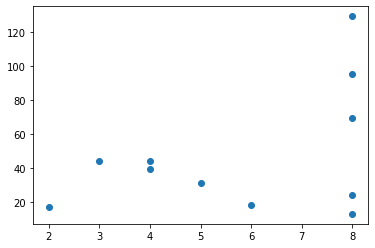

In [30]:
plt.scatter(x=pres_party['President Term'], y=pres_party["Avg Declarations per Year"])

In [31]:
# president_term = pres_party.groupby(["President"]).()
# president_term

In [32]:
#pres_term_df = pd.DataFrame(data=
#         {"President Term":president_term,
#         "President Term 2":pres_term_divide})

In [33]:
# pres_term_divide = president_term/4
# pres_term_divide

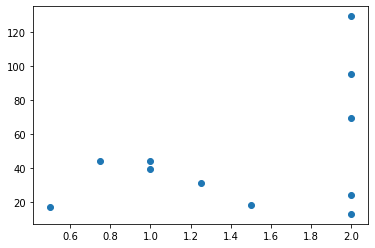

In [34]:
plt.scatter(x=pres_party['President Term 2'], y=pres_party["Avg Declarations per Year"])

In [35]:
pres_party['Avg Declarations per Year'].corr(pres_party['President Term 2'])

0.4245303990429382

In [36]:
#pres_party['President Term 2'].corr(pres_party['Avg Declarations per Year'])

In [37]:
new_cleaned_df = pd.merge(cleaned_df, pres_party, on="President", how="left")

In [38]:
new_cleaned_df

,Year,President,Party_x,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length,President Term,Disaster Count,Party_y,Avg Declarations per Year,President Term 2
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days,8,106,Republican,13.250,2.0
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days,8,106,Republican,13.250,2.0
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days,8,106,Republican,13.250,2.0
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days,8,106,Republican,13.250,2.0
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days,8,106,Republican,13.250,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days,8,763,Democrat,95.375,2.0
3415,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days,8,763,Democrat,95.375,2.0
3416,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days,8,763,Democrat,95.375,2.0
3417,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days,8,763,Democrat,95.375,2.0


In [39]:
dis_len_int = new_cleaned_df["Disaster Length"].dt.days

In [40]:
dis_len_int

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
3414     3.0
3415     1.0
3416    11.0
3417     3.0
3418     2.0
Name: Disaster Length, Length: 3419, dtype: float64

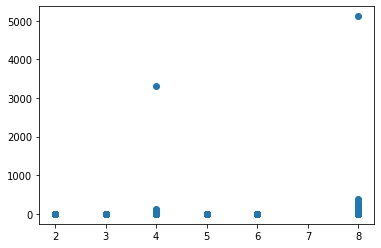

In [41]:
plt.scatter(x=new_cleaned_df['President Term'], y=(dis_len_int))

In [42]:
outliers = new_cleaned_df.loc[new_cleaned_df['Disaster Length'] >= '3000 days']
outliers

,Year,President,Party_x,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length,President Term,Disaster Count,Party_y,Avg Declarations per Year,President Term 2
919,1989,George Bush,Republican,DR-829,Disaster,Flood,LA,05/04/1989,05/27/1998,3310 days,4,159,Republican,39.750,1.0
955,1983,Ronald Reagan,Republican,DR-864,Disaster,Volcano,HI,01/24/1983,01/27/1997,5117 days,8,193,Republican,24.125,2.0


In [43]:
less_than_3000 = new_cleaned_df.loc[new_cleaned_df['Disaster Length'] < '3000 days']

In [44]:
less_than_3000

,Year,President,Party_x,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length,President Term,Disaster Count,Party_y,Avg Declarations per Year,President Term 2
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days,8,106,Republican,13.250,2.0
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days,8,106,Republican,13.250,2.0
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days,8,106,Republican,13.250,2.0
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days,8,106,Republican,13.250,2.0
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days,8,106,Republican,13.250,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days,8,763,Democrat,95.375,2.0
3415,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days,8,763,Democrat,95.375,2.0
3416,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days,8,763,Democrat,95.375,2.0
3417,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days,8,763,Democrat,95.375,2.0


In [45]:
dis_len_int_3000 = less_than_3000["Disaster Length"].dt.days

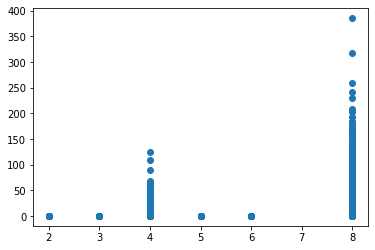

In [46]:
plt.scatter(x=less_than_3000['President Term'], y=dis_len_int_3000)

In [47]:
less_than_0 = less_than_3000.loc[less_than_3000['Disaster Length'] < '0 days']

In [48]:
less_than_0

,Year,President,Party_x,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length,President Term,Disaster Count,Party_y,Avg Declarations per Year,President Term 2


In [49]:
find_wrong_data = cleaned_df.loc[cleaned_df['Disaster Length'] == '-340 days']

In [50]:
find_wrong_data

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length


In [51]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days
...,...,...,...,...,...,...,...,...,...,...
80601,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days
80741,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days
80797,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days
80965,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days


In [52]:
less_than_3000["President Term"].corr(dis_len_int_3000)

0.18990893042391446

In [53]:
dis_len_int.corr(new_cleaned_df["President Term"])

0.034891950413423405

In [54]:
less_than_3000

,Year,President,Party_x,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length,President Term,Disaster Count,Party_y,Avg Declarations per Year,President Term 2
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days,8,106,Republican,13.250,2.0
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days,8,106,Republican,13.250,2.0
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days,8,106,Republican,13.250,2.0
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days,8,106,Republican,13.250,2.0
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days,8,106,Republican,13.250,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days,8,763,Democrat,95.375,2.0
3415,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days,8,763,Democrat,95.375,2.0
3416,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days,8,763,Democrat,95.375,2.0
3417,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days,8,763,Democrat,95.375,2.0


In [55]:
pres_party['Avg Declarations per Year'].corr(pres_party["President Term"])

0.4245303990429382

In [56]:
type(new_cleaned_df["Disaster Length"])

pandas.core.series.Series

In [57]:
# party_group = new_cleaned_df.groupby(["Party_x"])

In [58]:
# term_mean = party_group["President Term"].mean()

In [59]:
# term_mean

In [60]:
new_cleaned_df["Length in Days"] = new_cleaned_df["Disaster Length"].dt.days
new_cleaned_df

,Year,President,Party_x,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length,President Term,Disaster Count,Party_y,Avg Declarations per Year,President Term 2,Length in Days
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days,8,106,Republican,13.250,2.0,0.0
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days,8,106,Republican,13.250,2.0,0.0
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days,8,106,Republican,13.250,2.0,0.0
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days,8,106,Republican,13.250,2.0,0.0
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days,8,106,Republican,13.250,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days,8,763,Democrat,95.375,2.0,3.0
3415,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days,8,763,Democrat,95.375,2.0,1.0
3416,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days,8,763,Democrat,95.375,2.0,11.0
3417,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days,8,763,Democrat,95.375,2.0,3.0


In [61]:
average_length = new_cleaned_df.groupby(["Party_x"])["Length in Days"].mean()
average_length

Party_x
Democrat      14.366432
Republican    16.132537
Name: Length in Days, dtype: float64

In [62]:
median_length = new_cleaned_df.groupby(["Party_x"])["Length in Days"].median()
median_length

Party_x
Democrat      4.0
Republican    3.0
Name: Length in Days, dtype: float64

In [63]:
party_count = new_cleaned_df.groupby(["Party_x"])["President"].nunique()
party_count

Party_x
Democrat      5
Republican    6
Name: President, dtype: int64

In [64]:
total_decs_party = pres_party.groupby(["Party"])["Disaster Count"].sum()

total_years_party = pres_party.groupby(["Party"])["President Term"].sum()

average_declarations = total_decs_party / total_years_party
average_declarations

Party
Democrat      58.500000
Republican    49.472222
dtype: float64

In [65]:
decs_by_year = new_cleaned_df.groupby(["Year"])["Declaration Number"].nunique()

decs_by_year_df = pd.DataFrame(data = {"Number of Declarations per Year": decs_by_year}).reset_index()
decs_by_year_df.tail(15)

,Year,Number of Declarations per Year
49,2002,122
50,2003,125
51,2004,119
52,2005,158
53,2006,141
54,2007,130
55,2008,147
56,2009,119
57,2010,101
58,2011,239


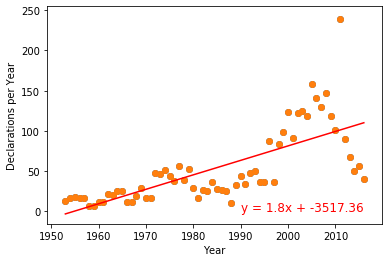

In [66]:
x_values = decs_by_year_df["Year"]
y_values = decs_by_year_df["Number of Declarations per Year"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1990,0),fontsize=12,color="red")
plt.xlabel('Year')
plt.ylabel('Declarations per Year')
plt.show()

In [67]:
decs_by_year_df["Year"].corr(decs_by_year_df["Number of Declarations per Year"])

0.717755813248626

In [68]:
pres_party

,President,President Term,Disaster Count,Party,Avg Declarations per Year,President Term 2
0,Barack Obama,8,763,Democrat,95.375000,2.00
1,Bill Clinton,8,554,Democrat,69.250000,2.00
2,Dwight D. Eisenhower,8,106,Republican,13.250000,2.00
3,George Bush,4,159,Republican,39.750000,1.00
4,George W. Bush,8,1033,Republican,129.125000,2.00
5,Gerald Ford,3,133,Republican,44.333333,0.75
6,Jimmy Carter,4,176,Democrat,44.000000,1.00
7,John F. Kennedy,2,34,Democrat,17.000000,0.50
8,Lyndon B. Johnson,6,111,Democrat,18.500000,1.50
9,Richard M. Nixon,5,157,Republican,31.400000,1.25


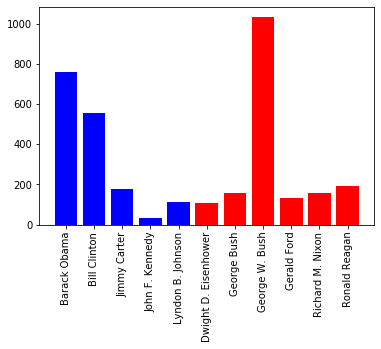

In [69]:
x_axis_pres = pres_party["President"]
y_axis_pres = pres_party["Disaster Count"]

mask1 = pres_party["Party"] == 'Democrat'
mask2 = pres_party["Party"] == 'Republican'

plt.bar(x_axis_pres[mask1], y_axis_pres[mask1], color = 'blue')
plt.bar(x_axis_pres[mask2], y_axis_pres[mask2], color = 'red')
xticks = plt.xticks(rotation="vertical")

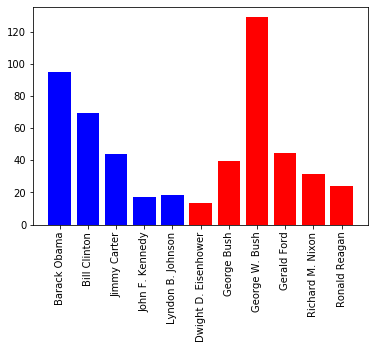

In [70]:
x_axis_decs = pres_party["President"]
y_axis_decs = pres_party["Avg Declarations per Year"]

plt.bar(x_axis_decs[mask1], y_axis_decs[mask1], color = 'blue')
plt.bar(x_axis_decs[mask2], y_axis_decs[mask2], color = 'red')
xticks = plt.xticks(rotation="vertical")